<a href="https://colab.research.google.com/github/BiancaPedrosa/datascience/blob/master/Bootcamp1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Projeto Módulo I Bootcamp Alura
Bianca Pedrosa
Análise dos casos de turbeculose no estado de SP entre 2009 - 2018

Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leitura dos dados

In [2]:
#tabela completa

#url="https://raw.githubusercontent.com/BiancaPedrosa/datascience/master/dados/tabelautf8.csv"

url="/content/tabelautf8a.csv"


dados = pd.read_csv(url, encoding="ISO-8859-1", engine='python', sep=";",thousands=".", decimal=",", skiprows=1,index_col=0)
dados

,ID,2009,POP2009,2010,POP2010,2011,POP2011,2012,POP2012,2013,POP2013,2014,POP2014,2015,POP2015,2016,POP2016,2017,POP2017,2018,POP2018,TOTAL
MUNICIPIO,,,,,,,,,,,,,,,,,,,,,,
ADAMANTINA,3500105.0,5,34424.0,5,33797.0,5,33820.0,6,33843.0,6,34953.0,4,35001.0,6,35048.0,4,35094.0,5,35139.0,5,35023.0,51.0
ADOLFO,3500204.0,-,3710.0,-,3557.0,1,3547.0,2,3538.0,-,3639.0,2,3631.0,-,3623.0,2,3616.0,2,3609.0,-,3571.0,9.0
AGUAI,3500303.0,8,32101.0,14,32168.0,12,32451.0,15,32745.0,8,34188.0,8,34530.0,8,34863.0,10,35189.0,7,35508.0,3,35954.0,93.0
AGUAS DA PRATA,3500402.0,-,7734.0,-,7580.0,-,7619.0,1,7653.0,1,7942.0,-,7984.0,-,8025.0,-,8065.0,1,8104.0,1,8137.0,4.0
AGUAS DE LINDOIA,3500501.0,2,16341.0,3,17261.0,1,17353.0,4,17438.0,1,18108.0,1,18212.0,2,18313.0,5,18412.0,5,18509.0,2,18599.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VITORIA BRASIL,3556958.0,-,1662.0,1,1737.0,2,1742.0,-,1747.0,-,1809.0,-,1815.0,1,1821.0,1,1827.0,-,1833.0,-,1834.0,5.0
VOTORANTIM,3557006.0,42,105193.0,38,108872.0,37,109798.0,40,110755.0,49,115585.0,23,116706.0,30,117794.0,42,118858.0,38,119898.0,47,121331.0,386.0
VOTUPORANGA,3557105.0,20,81279.0,29,84728.0,20,85387.0,18,86059.0,20,89715.0,14,90508.0,16,91278.0,20,92032.0,10,92768.0,19,93736.0,186.0


Tratando a ausência de dados

In [3]:
dados = dados.replace('-', np.nan)
dados.head()

,ID,2009,POP2009,2010,POP2010,2011,POP2011,2012,POP2012,2013,POP2013,2014,POP2014,2015,POP2015,2016,POP2016,2017,POP2017,2018,POP2018,TOTAL
MUNICIPIO,,,,,,,,,,,,,,,,,,,,,,
ADAMANTINA,3500105.0,5,34424.0,5,33797.0,5,33820.0,6,33843.0,6,34953.0,4,35001.0,6,35048.0,4,35094.0,5,35139.0,5,35023.0,51.0
ADOLFO,3500204.0,NaN,3710.0,NaN,3557.0,1,3547.0,2,3538.0,NaN,3639.0,2,3631.0,NaN,3623.0,2,3616.0,2,3609.0,NaN,3571.0,9.0
AGUAI,3500303.0,8,32101.0,14,32168.0,12,32451.0,15,32745.0,8,34188.0,8,34530.0,8,34863.0,10,35189.0,7,35508.0,3,35954.0,93.0
AGUAS DA PRATA,3500402.0,NaN,7734.0,NaN,7580.0,NaN,7619.0,1,7653.0,1,7942.0,NaN,7984.0,NaN,8025.0,NaN,8065.0,1,8104.0,1,8137.0,4.0
AGUAS DE LINDOIA,3500501.0,2,16341.0,3,17261.0,1,17353.0,4,17438.0,1,18108.0,1,18212.0,2,18313.0,5,18412.0,5,18509.0,2,18599.0,26.0


Conferindo as células sem valor


In [4]:
dados.T.info()
dados.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, ID to TOTAL
Columns: 646 entries, ADAMANTINA to TOTAL
dtypes: object(646)
memory usage: 111.8+ KB


1526

In [5]:
dados = dados.astype('float64')
dados.head()

,ID,2009,POP2009,2010,POP2010,2011,POP2011,2012,POP2012,2013,POP2013,2014,POP2014,2015,POP2015,2016,POP2016,2017,POP2017,2018,POP2018,TOTAL
MUNICIPIO,,,,,,,,,,,,,,,,,,,,,,
ADAMANTINA,3500105.0,5.0,34424.0,5.0,33797.0,5.0,33820.0,6.0,33843.0,6.0,34953.0,4.0,35001.0,6.0,35048.0,4.0,35094.0,5.0,35139.0,5.0,35023.0,51.0
ADOLFO,3500204.0,NaN,3710.0,NaN,3557.0,1.0,3547.0,2.0,3538.0,NaN,3639.0,2.0,3631.0,NaN,3623.0,2.0,3616.0,2.0,3609.0,NaN,3571.0,9.0
AGUAI,3500303.0,8.0,32101.0,14.0,32168.0,12.0,32451.0,15.0,32745.0,8.0,34188.0,8.0,34530.0,8.0,34863.0,10.0,35189.0,7.0,35508.0,3.0,35954.0,93.0
AGUAS DA PRATA,3500402.0,NaN,7734.0,NaN,7580.0,NaN,7619.0,1.0,7653.0,1.0,7942.0,NaN,7984.0,NaN,8025.0,NaN,8065.0,1.0,8104.0,1.0,8137.0,4.0
AGUAS DE LINDOIA,3500501.0,2.0,16341.0,3.0,17261.0,1.0,17353.0,4.0,17438.0,1.0,18108.0,1.0,18212.0,2.0,18313.0,5.0,18412.0,5.0,18509.0,2.0,18599.0,26.0


Selecionando as colunas usáveis

In [6]:
dados_usaveis = dados.loc[:,'2009':'2018']
dados_usaveis

,2009,POP2009,2010,POP2010,2011,POP2011,2012,POP2012,2013,POP2013,2014,POP2014,2015,POP2015,2016,POP2016,2017,POP2017,2018
MUNICIPIO,,,,,,,,,,,,,,,,,,,
ADAMANTINA,5.0,34424.0,5.0,33797.0,5.0,33820.0,6.0,33843.0,6.0,34953.0,4.0,35001.0,6.0,35048.0,4.0,35094.0,5.0,35139.0,5.0
ADOLFO,NaN,3710.0,NaN,3557.0,1.0,3547.0,2.0,3538.0,NaN,3639.0,2.0,3631.0,NaN,3623.0,2.0,3616.0,2.0,3609.0,NaN
AGUAI,8.0,32101.0,14.0,32168.0,12.0,32451.0,15.0,32745.0,8.0,34188.0,8.0,34530.0,8.0,34863.0,10.0,35189.0,7.0,35508.0,3.0
AGUAS DA PRATA,NaN,7734.0,NaN,7580.0,NaN,7619.0,1.0,7653.0,1.0,7942.0,NaN,7984.0,NaN,8025.0,NaN,8065.0,1.0,8104.0,1.0
AGUAS DE LINDOIA,2.0,16341.0,3.0,17261.0,1.0,17353.0,4.0,17438.0,1.0,18108.0,1.0,18212.0,2.0,18313.0,5.0,18412.0,5.0,18509.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VITORIA BRASIL,NaN,1662.0,1.0,1737.0,2.0,1742.0,NaN,1747.0,NaN,1809.0,NaN,1815.0,1.0,1821.0,1.0,1827.0,NaN,1833.0,NaN
VOTORANTIM,42.0,105193.0,38.0,108872.0,37.0,109798.0,40.0,110755.0,49.0,115585.0,23.0,116706.0,30.0,117794.0,42.0,118858.0,38.0,119898.0,47.0
VOTUPORANGA,20.0,81279.0,29.0,84728.0,20.0,85387.0,18.0,86059.0,20.0,89715.0,14.0,90508.0,16.0,91278.0,20.0,92032.0,10.0,92768.0,19.0


Criando novos dados


In [11]:
dados["new2009"] = np.where(dados["2009"]==np.nan,  np.nan,(dados["2009"]/dados["POP2009"]))
dados["new2010"] = np.where(dados["2010"]==np.nan,  np.nan,(dados["2010"]/dados["POP2010"]))
dados["new2011"] = np.where(dados["2011"]==np.nan,  np.nan,(dados["2011"]/dados["POP2011"]))
dados["new2012"] = np.where(dados["2012"]==np.nan,  np.nan,(dados["2012"]/dados["POP2012"]))
dados["new2013"] = np.where(dados["2013"]==np.nan,  np.nan,(dados["2013"]/dados["POP2013"]))
dados["new2014"] = np.where(dados["2014"]==np.nan,  np.nan,(dados["2014"]/dados["POP2014"]))
dados["new2015"] = np.where(dados["2015"]==np.nan,  np.nan,(dados["2015"]/dados["POP2015"]))
dados["new2016"] = np.where(dados["2016"]==np.nan,  np.nan,(dados["2016"]/dados["POP2016"]))
dados["new2017"] = np.where(dados["2017"]==np.nan,  np.nan,(dados["2017"]/dados["POP2017"]))
dados["new2018"] = np.where(dados["2018"]==np.nan,  np.nan,(dados["2018"]/dados["POP2018"]))




In [13]:
dadospop = dados.loc[:,"new2009":"new2018"]
dadospop

,new2009,new2010,new2011,new2012,new2013,new2014,new2015,new2016,new2017,new2018
MUNICIPIO,,,,,,,,,,
ADAMANTINA,0.000145,0.000148,0.000148,0.000177,0.000172,0.000114,0.000171,0.000114,0.000142,0.000143
ADOLFO,NaN,NaN,0.000282,0.000565,NaN,0.000551,NaN,0.000553,0.000554,NaN
AGUAI,0.000249,0.000435,0.000370,0.000458,0.000234,0.000232,0.000229,0.000284,0.000197,0.000083
AGUAS DA PRATA,NaN,NaN,NaN,0.000131,0.000126,NaN,NaN,NaN,0.000123,0.000123
AGUAS DE LINDOIA,0.000122,0.000174,0.000058,0.000229,0.000055,0.000055,0.000109,0.000272,0.000270,0.000108
...,...,...,...,...,...,...,...,...,...,...
VITORIA BRASIL,NaN,0.000576,0.001148,NaN,NaN,NaN,0.000549,0.000547,NaN,NaN
VOTORANTIM,0.000399,0.000349,0.000337,0.000361,0.000424,0.000197,0.000255,0.000353,0.000317,0.000387
VOTUPORANGA,0.000246,0.000342,0.000234,0.000209,0.000223,0.000155,0.000175,0.000217,0.000108,0.000203


In [17]:
#ordenando
dadospop["Total"] = dadospop.sum(axis=1)
ordenado = dadospop.sort_values("Total", ascending=False)
ordenado = ordenado.drop("Total", axis=1)
ordenado.head()

,new2009,new2010,new2011,new2012,new2013,new2014,new2015,new2016,new2017,new2018
MUNICIPIO,,,,,,,,,,
BALBINOS,0.006813,0.005341,0.008494,0.006153,0.008798,0.009289,0.009753,0.011386,0.014264,0.010484
LAVINIA,0.005506,0.007060,0.008831,0.007610,0.007904,0.008838,0.008215,0.008919,0.012370,0.008143
SUZANO,0.000348,0.000339,0.000332,0.000445,0.000401,0.000404,0.000414,0.000403,0.031022,0.031961
ALVARO DE CARVALHO,0.004213,0.005161,0.003197,0.003593,0.004051,0.006621,0.006163,0.004729,0.006642,0.006179
MARABA PAULISTA,0.002835,0.003117,0.004084,0.003814,0.004951,0.005239,0.005888,0.006336,0.005881,0.005211


Text(0, 0.5, 'Nº de Internação')

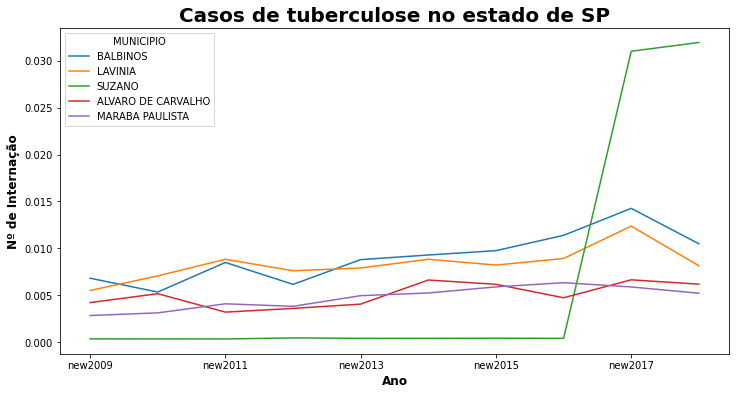

In [19]:
grafico = ordenado.head().T.plot(figsize=(12, 6))
plt.title('Casos de tuberculose no estado de SP', fontsize = 20, fontweight = 'bold')

grafico.set_xlabel('Ano', fontsize=12,fontweight = 'bold')
grafico.set_ylabel('Nº de Internação', fontsize=12, fontweight = 'bold')


